<a href="https://colab.research.google.com/github/kyo1988/Kyo.github.io/blob/gh-pages/Corporate_Finance_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Web scraping for financial statements with Python [online:] https://towardsdatascience.com/web-scraping-for-accounting-analysis-using-python-part-1-b5fc016a1c9a

import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
from google.colab import files

# Enter a stock symbol
index= 'G4M.L'
# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

read_data = ur.urlopen(url_is).read() 
soup_is= BeautifulSoup(read_data,'lxml')

ls= [] # Create empty list
for l in soup_is.find_all('div'): 
  #Find all data structure that is ‘div’
  ls.append(l.string) # add each element one by one to the list
 
#ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
ls = [e for e in ls]

new_ls = list(filter(None,ls))
new_ls = new_ls[12:]
# HFD.L has only 4 years and G4M.L has 4 years
# is_data = list(zip(*[iter(new_ls)]*6))
is_data = list(zip(*[iter(new_ls)]*5))
Income_st = pd.DataFrame(is_data[0:])

Income_st.columns = Income_st.iloc[0] # Name columns to first row of dataframe
Income_st = Income_st.iloc[1:,] # start to read 1st row
Income_st = Income_st.T # transpose dataframe
Income_st.columns = Income_st.iloc[0] #Name columns to first row of dataframe
Income_st.drop(Income_st.index[0],inplace=True) #Drop first index row
Income_st.index.name = '' # Remove the index name
Income_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year
#Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns

Income_st

writer = pd.ExcelWriter('G4MLIncomeStatement.xlsx')
Income_st.to_excel(writer)
writer.save()
files.download('G4MLIncomeStatement.xlsx')

#wbw = pd.ExcelWriter(path + 'new_book_2.xlsx')
#df_1.to_excel(wbw, 'first_sheet')
#df_2.to_excel(wbw, 'second_sheet')
#wbw.save()

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
from google.colab import files

# Enter a stock symbol
index= 'G4M.L'
# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

read_data = ur.urlopen(url_bs).read() 
soup_bs= BeautifulSoup(read_data,'lxml')

bs= [] # Create empty list
for l in soup_bs.find_all('div'): 
  #Find all data structure that is ‘div’
  bs.append(l.string) # add each element one by one to the list
 
bs = [e for e in bs]

new_bs = list(filter(None,bs))
new_bs = new_bs[12:]
# HFD.L has only 4 years and G4M.L has 3 years
# bs_data = list(zip(*[iter(new_bs)]*5))
bs_data = list(zip(*[iter(new_bs)]*4))
Balance_st = pd.DataFrame(bs_data[0:])

Balance_st.columns = Balance_st.iloc[0] # Name columns to first row of dataframe
Balance_st = Balance_st.iloc[1:,] # start to read 1st row
Balance_st = Balance_st.T # transpose dataframe
Balance_st.columns = Balance_st.iloc[0] #Name columns to first row of dataframe
Balance_st.drop(Balance_st.index[0],inplace=True) #Drop first index row
Balance_st.index.name = '' # Remove the index name
#Balance_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year

Balance_st

writer = pd.ExcelWriter('G4MLBalanceSheet.xlsx')
Balance_st.to_excel(writer)
writer.save()
files.download('G4MLBalanceSheet.xlsx')

In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
from google.colab import files

# Enter a stock symbol
index= 'G4M.L'
# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index +'/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

read_data = ur.urlopen(url_cf).read() 
soup_cf= BeautifulSoup(read_data,'lxml')

cf= [] # Create empty list
for l in soup_cf.find_all('div'): 
  #Find all data structure that is ‘div’
  cf.append(l.string) # add each element one by one to the list
 
cf = [e for e in cf]

new_cf = list(filter(None,cf))
new_cf = new_cf[12:]
# HFD.L has only 4 years and G4M.L has 4 years
# cf_data = list(zip(*[iter(new_ls)]*6))
cf_data = list(zip(*[iter(new_cf)]*5))
CashFlow_st = pd.DataFrame(cf_data[0:])

CashFlow_st.columns = CashFlow_st.iloc[0] # Name columns to first row of dataframe
CashFlow_st = CashFlow_st.iloc[1:,] # start to read 1st row
CashFlow_st = CashFlow_st.T # transpose dataframe
CashFlow_st.columns = CashFlow_st.iloc[0] #Name columns to first row of dataframe
CashFlow_st.drop(CashFlow_st.index[0],inplace=True) #Drop first index row
CashFlow_st.index.name = '' # Remove the index name
CashFlow_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year

CashFlow_st

writer = pd.ExcelWriter('G4MLCashFlow.xlsx')
CashFlow_st.to_excel(writer)
writer.save()
files.download('G4MLCashFlow.xlsx')

In [ ]:
# RETRIEVING STOCK STATISTICS FROM YAHOO FINANCE USING PYTHON [Online:] https://simply-python.com/2019/01/16/retrieving-stock-statistics-from-yahoo-finance-using-python/

import pandas as pd
from google.colab import files

def get_key_stats(tgt_website):
 
    # The web page is make up of several html table. By calling read_html function.
    # all the tables are retrieved in dataframe format.
    # Next is to append all the table and transpose it to give a nice one row data.
    df_list = pd.read_html(tgt_website)
    result_df = df_list[0]
 
    for df in df_list[1:]:
        result_df = result_df.append(df)
 
    # The data is in column format.
    # Transpose the result to make all data in single row
    return result_df.set_index(0).T

# PDG.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/PDG.L/key-statistics?p=PDG.L'
PDG_df = get_key_stats(tgt_website)

# G4M.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/G4M.L/key-statistics?p=G4M.L'
G4M_df = get_key_stats(tgt_website)

# CAMB.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/CAMB.L/key-statistics?p=CAMB.L'
CAMB_df = get_key_stats(tgt_website)

# VTU.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/VTU.L/key-statistics?p=VTU.L'
VTU_df = get_key_stats(tgt_website)

# WINE.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/WINE.L/key-statistics?p=WINE.L'
WINE_df = get_key_stats(tgt_website)

# LOOK.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/LOOK.L/key-statistics?p=LOOK.L'
LOOK_df = get_key_stats(tgt_website)

# MOTR.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/MOTR.L/key-statistics?p=MOTR.L'
MOTR_df = get_key_stats(tgt_website)

# HFD.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/HFD.L/key-statistics?p=HFD.L'
HFD_df = get_key_stats(tgt_website)

# CARD.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/CARD.L/key-statistics?p=CARD.L'
CARD_df = get_key_stats(tgt_website)

# WOSG.L key-statistics
tgt_website = r'https://finance.yahoo.com/quote/WOSG.L/key-statistics?p=WOSG.L'
WOSG_df = get_key_stats(tgt_website)

wbw = pd.ExcelWriter('KeyStatistics.xlsx')
PDG_df.to_excel(wbw, 'PDG.L')
G4M_df.to_excel(wbw, 'G4M.L')
CAMB_df.to_excel(wbw, 'CAMB.L')
VTU_df.to_excel(wbw, 'VTU.L')
WINE_df.to_excel(wbw, 'WINE.L')
LOOK_df.to_excel(wbw, 'LOOK.L')
MOTR_df.to_excel(wbw, 'MOTR.L')
HFD_df.to_excel(wbw, 'HFD.L')
CARD_df.to_excel(wbw, 'CARD.L')
WOSG_df.to_excel(wbw, 'WOSG.L')
wbw.save()

files.download('KeyStatistics.xlsx')

No handles with labels found to put in legend.


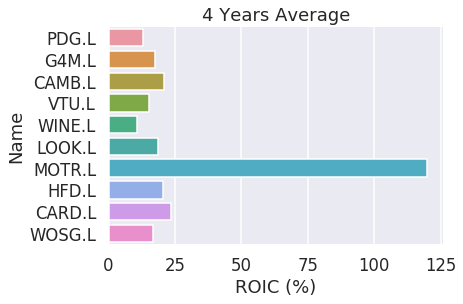

In [ ]:
# seaborn barplot [Online:] https://pythonbasics.org/seaborn_barplot/
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

sns.set(style='darkgrid', context='talk', palette='Dark2')
# sns.set_context('paper')

# Create empty dataframe
df = pd.DataFrame()

df['Name'] = ['PDG.L','G4M.L','CAMB.L','VTU.L','WINE.L','LOOK.L','MOTR.L','HFD.L','CARD.L','WOSG.L']

# As of 2018
# df['ROIC (%)'] = [0.242,12.750,16.112,14.761,13.439,15.176,80.714,18.801,22.496,15.153]

# 3-4 Years Average
df['ROIC (%)'] = [12.92, 17.30, 20.82, 15.19, 10.87, 18.51, 119.98, 20.59, 23.56, 16.73]

#f, ax = plt.subplots(figsize = (6,15))

# sns.set_color_codes('pastel')
sns.barplot(x = 'ROIC (%)', y = 'Name', data = df)

#sns.set_color_codes('muted')
#sns.barplot(x = 'ROIC 3-4 Years Average (%)', y = 'Name', data = df,
#            label = 'ROIC 3-4 Years Average (%)', color = 'b', edgecolor = 'w')

ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)

# Set title
plt.title('4 Years Average')

plt.savefig('ROIC 4 Years Average', bbox_inches='tight')
files.download("ROIC 4 Years Average.png")

plt.show()

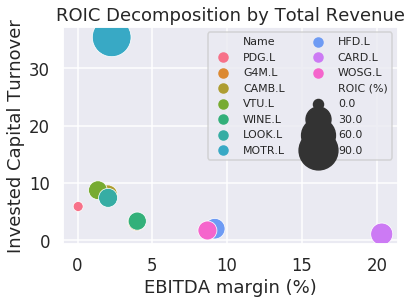

In [ ]:
# Python: Plot scatter plot with category and markersize [duplicate] [online:] https://stackoverflow.com/questions/44802561/python-plot-scatter-plot-with-category-and-markersize
# The Art of Effective Visualization of Multi-dimensional Data [online:] https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57
# Ultimate guide to create Scatterplots with Seaborn [online:] https://honingds.com/blog/seaborn-scatterplot/

import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
sns.set(style='darkgrid', context='talk', palette='Dark2')

# Create empty dataframe
df = pd.DataFrame()

# As of 2018
df['EBITDA margin (%)'] = [0.04,3.96,2.02,1.36,3.99,2.04,2.28,9.17,20.33,8.68]

df['Invested Capital Turnover'] = [5.92,3.22,7.99,8.76,3.37,7.43,35.40,2.05,1.11,1.74]

df['ROIC (%)'] = [0.242,12.750,16.112,14.761,13.439,15.176,80.714,18.801,22.496,15.153]

df['Name'] = ['PDG.L','G4M.L','CAMB.L','VTU.L','WINE.L','LOOK.L','MOTR.L','HFD.L','CARD.L','WOSG.L']

sns.scatterplot('EBITDA margin (%)', # Horizontal axis
           'Invested Capital Turnover', # Vertical axis
           data=df, # Data source
           hue='Name', # Set color
           size='ROIC (%)',
           sizes=(100, 1500)
           )

# Set title
plt.title('ROIC Decomposition by Total Revenue')

# Set x-axis label
plt.xlabel('EBITDA margin (%)')

# Set y-axis label
plt.ylabel('Invested Capital Turnover')

plt.legend(loc='best', ncol=2, prop={'size':11})

plt.savefig('ROIC Decomposition by Total Revenue', bbox_inches='tight')
files.download("ROIC Decomposition by Total Revenue.png")
plt.show()

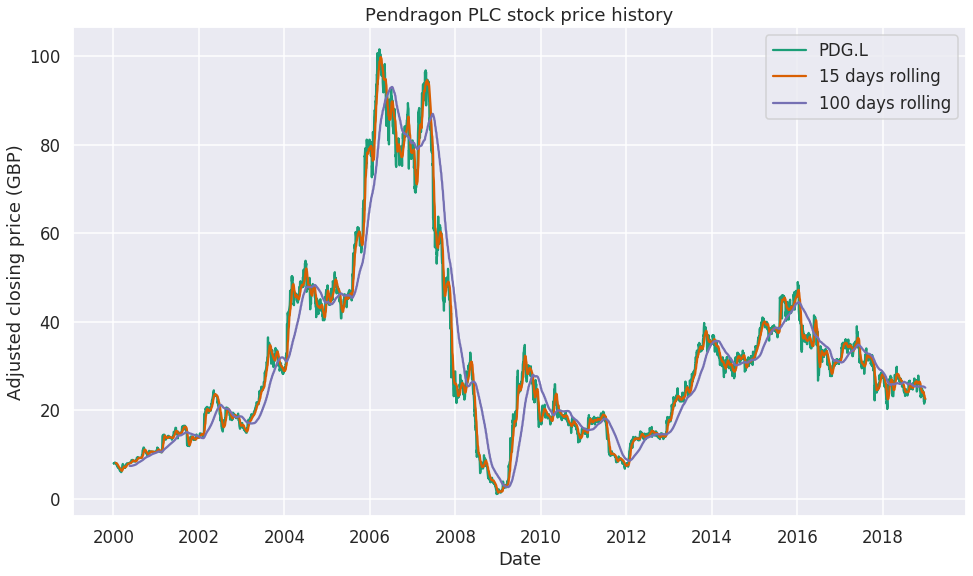

In [ ]:
# Python for Finance, Part I: Yahoo & Google Finance API, pandas, and matplotlib [Online:] https://learndatasci.com/tutorials/python-finance-part-yahoo-finance-api-pandas-matplotlib/

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files

# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
# tickers = ['PDG.L', 'G4M.L', 'CAMB.L', 'VTU.L', 'WINE.L', 'LOOK.L', 'MOTR.L', 'HFD.L', 'CARD.L', 'WOSG.L']
tickers = ['PDG.L', 'G4M.L', 'CAMB.L', 'VTU.L', 'WINE.L', 'LOOK.L', 'MOTR.L', 'HFD.L', 'CARD.L'] # why WOSG.L does not exist

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2000-01-01'
end_date = '2018-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

# panel_data.head(9)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

# print(all_weekdays)

# close.head(10)

# close.describe()

# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date.
msft = close.loc[:, 'PDG.L']

# Calculate the 20 and 100 days moving averages of the closing prices
short_rolling_msft = msft.rolling(window=15).mean()
long_rolling_msft = msft.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(msft.index, msft, label='PDG.L')
ax.plot(short_rolling_msft.index, short_rolling_msft, label='15 days rolling')
ax.plot(long_rolling_msft.index, long_rolling_msft, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price (GBP)')
ax.legend()

# Set title
plt.title('Pendragon PLC stock price history')

plt.savefig('Pendragon PLC stock price history', bbox_inches='tight')
files.download("Pendragon PLC stock price history.png")

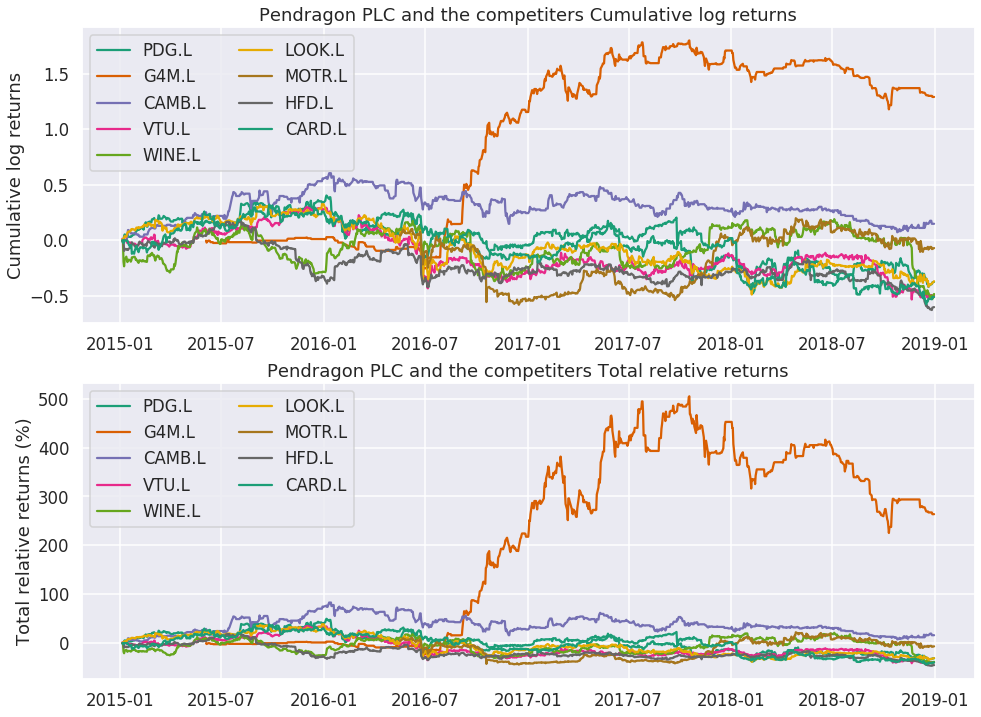

In [ ]:
# for Finance, Part 2: Intro to Quantitative Trading Strategies [Online:] https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
sns.set(style='darkgrid', context='talk', palette='Dark2')

tickers = ['PDG.L', 'G4M.L', 'CAMB.L', 'VTU.L', 'WINE.L', 'LOOK.L', 'MOTR.L', 'HFD.L', 'CARD.L'] # why WOSG.L does not exist

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2015-01-01'
end_date = '2018-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

# Calculating the short-window moving average
# short_rolling = close.rolling(window=20).mean()

# Calculating the short-window moving average
# long_rolling = close.rolling(window=100).mean()

# Relative returns
returns = close.pct_change(1)

# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best', ncol=2)
ax1.set_title("Pendragon PLC and the competiters Cumulative log returns")

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best', ncol=2)
ax2.set_title("Pendragon PLC and the competiters Total relative returns")

plt.savefig('Pendragon PLC and the competiters Cumulative log returns and Total relative returns', bbox_inches='tight')
files.download("Pendragon PLC and the competiters Cumulative log returns and Total relative returns.png")

plt.show()

In [ ]:
import scipy as sp
df = sp.random.standard_normal(size=10)
df

array([-1.11219613,  0.15205368,  0.4314517 ,  0.26583914, -0.141186  ,
       -0.26341464,  0.33109368,  0.61936181, -0.44695579, -1.2172517 ])

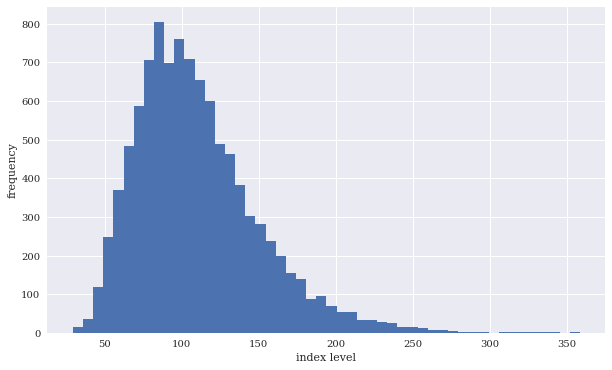

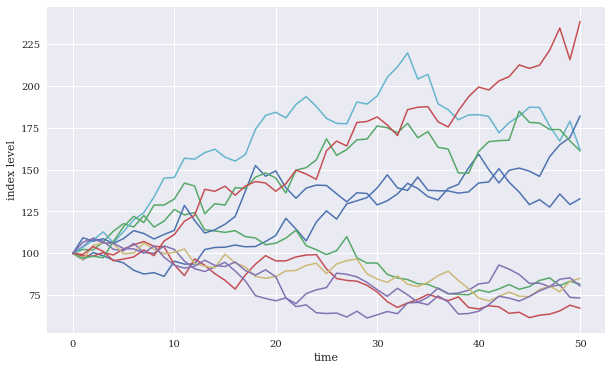

In [ ]:
import math
import numpy as np
import numpy.random as npr  
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

import scipy.stats as scs

S0 = 100  
r = 0.05  
sigma = 0.25  
I = 10000  
M = 50  
T = 2.0  
dt = T / M  
S = np.zeros((M + 1, I))  
S[0] = S0  
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
            sigma * math.sqrt(dt) * npr.standard_normal(I))  
    
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency');

plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level');

[None]

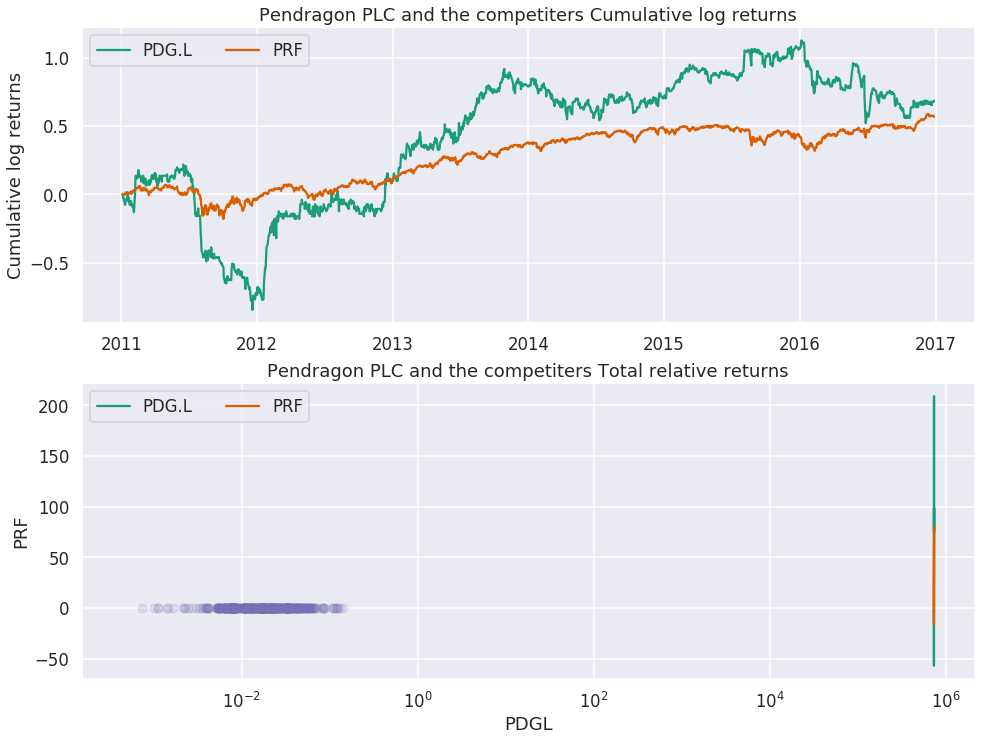

In [ ]:
# for Finance, Part 2: Intro to Quantitative Trading Strategies [Online:] https://www.learndatasci.com/tutorials/python-finance-part-2-intro-quantitative-trading-strategies/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data
import seaborn as sns
from google.colab import files
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pandas.plotting import lag_plot
from matplotlib import pyplot

sns.set(style='darkgrid', context='talk', palette='Dark2')

tickers = ['PDG.L', 'PRF']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2011-01-01'
end_date = '2016-12-28'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Close']

# Getting all weekdays between 01/01/2000 and 12/31/2016
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(all_weekdays)

# Reindexing will insert missing values (NaN) for the dates that were not present
# in the original set. To cope with this, we can fill the missing by replacing them
# with the latest available price for each instrument.
close = close.fillna(method='ffill')

# Calculating the short-window moving average
# short_rolling = close.rolling(window=20).mean()

# Calculating the short-window moving average
# long_rolling = close.rolling(window=100).mean()

# Relative returns
returns = close.pct_change(1)

# Log returns - First the logarithm of the prices is taken and the the difference of consecutive (log) observations
log_returns = np.log(close).diff()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))

for c in log_returns:
    ax1.plot(log_returns.index, log_returns[c].cumsum(), label=str(c))

ax1.set_ylabel('Cumulative log returns')
ax1.legend(loc='best', ncol=2)
ax1.set_title("Pendragon PLC and the competiters Cumulative log returns")

for c in log_returns:
    ax2.plot(log_returns.index, 100*(np.exp(log_returns[c].cumsum()) - 1), label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best', ncol=2)
ax2.set_title("Pendragon PLC and the competiters Total relative returns")

# plt.savefig('Pendragon PLC and the competiters Cumulative log returns and Total relative returns', bbox_inches='tight')
# files.download("Pendragon PLC and the competiters Cumulative log returns and Total relative returns.png")

#plt.show()

log_returns.columns = ['PDGL', 'PRF']
returns.columns = ['PDGL', 'PRF']
log_returns = log_returns.dropna()
returns = returns.dropna()
#og_returns.head()

#est = smf.ols(formula='PDGL ~ PRF', data=log_returns).fit()
#print(est.summary())
#print(est.conf_int())

#log_returns.corr()

#beta =log_returns.corr() / returns['PRF'].var()
#beta

#sns.scatterplot(data = log_returns, x = 'PDGL', y = 'PRF')
log_returns.min()
splot=sns.regplot(x='PDGL', y='PRF',
            data=log_returns, scatter_kws={'alpha':0.15}, fit_reg=False)
splot.set(xscale="log")
#lag_plot(log_returns)
#pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.values' or 'np.asarray(..)' instead.


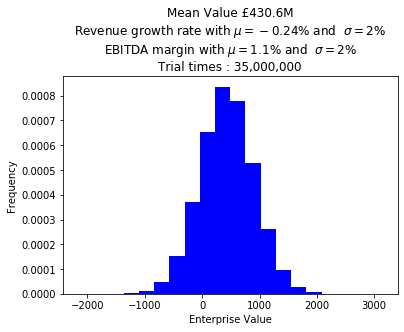

In [ ]:
# Python and Finance – Power Up Your Spreadsheets [online:] https://www.toptal.com/finance/financial-modeling/python-and-finance
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#sns.set(style='darkgrid', context='talk', palette='Dark2')

# Key inputs from DCF model
years = 5
starting_sales = 4126100/1000
depr_percent = 0.66/100
sales_growth = -0.24/100
ebitda_margin = 1.10/100
tax_rate = 17/100

# DCF assumptions
r = 3.81/100
g = sales_growth
roic = 12.92/100

# For MCS model
iterations = 35000000
sales_std_dev = 0.02
ebitda_std_dev = 0.02

# Generate probability distributions
sales_growth_dist = np.random.normal(loc=sales_growth, scale=sales_std_dev, size=(years, iterations))
ebitda_margin_dist = np.random.normal(loc=ebitda_margin, scale=ebitda_std_dev, size=(years, iterations))
    
# Calculate free cash flow
sales_growth_dist += 1
for i in range(1, len(sales_growth_dist)):
    sales_growth_dist[i] *= sales_growth_dist[i-1]
sales = sales_growth_dist * starting_sales
ebitda = sales * ebitda_margin_dist
ebit = ebitda - (sales * depr_percent)
tax = -(ebit * tax_rate)

free_cash_flow = ebitda + tax
    
# Discount cash flows to get DCF value
g = sales_growth_dist[-1]
terminal_value = free_cash_flow[-1] * (1 - g / roic) / (r - g)
discount_rates = [(1 / (1 + r)) ** i for i in range (1,6)]
dcf_value = sum((free_cash_flow.T * discount_rates).T) 
dcf_value += terminal_value * discount_rates[-1]

#%time plt.hist(dcf_value, bins=20, density=True, color="b")

PDG_df = pd.DataFrame(dcf_value)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.hist(dcf_value, bins=20, density=True, color="b")
ax.set_title('Mean Value £' + str(PDG_df.get_values().mean().round(2)) + 'M' + '\nRevenue growth rate with $\mu=-0.24$% and $\ \sigma=2$%' + '\nEBITDA margin with $\mu=1.1$% and $\ \sigma=2$%' + '\nTrial times : 35,000,000')
ax.set_xlabel('Enterprise Value')
ax.set_ylabel('Frequency')
#fig.show()

fig.savefig('MCSimilationForValuetion', bbox_inches='tight')
files.download("MCSimilationForValuetion.png")